In [2]:
!pip install utils fastbook torch torchvision torchaudio "numpy<2.0"

In [1]:
import torch

In [1]:
import torch
import matplotlib.pyplot as plt

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim:
        plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None:
        plt.title(title)

# How do we fit a function to data?

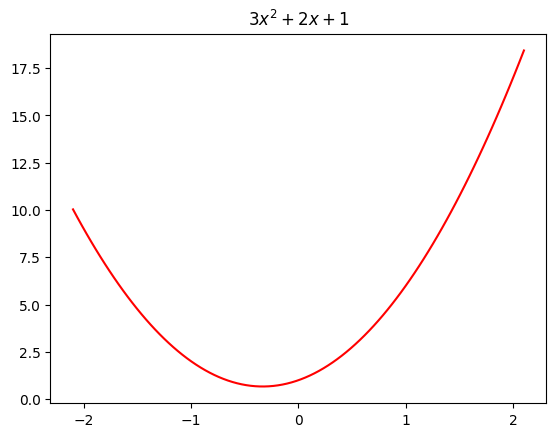

In [171]:
def f(x):
    return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [172]:
def quad(a, b, c, x):
    return a*x**2 + b*x + c

In [173]:
quad(3, 2, 1, 1.5)

10.75

In [174]:
from functools import partial

def make_quad(a, b, c):
    return partial(quad, a, b, c)

In [177]:
f = make_quad(3, 2, 1)
f(1.5)

10.75

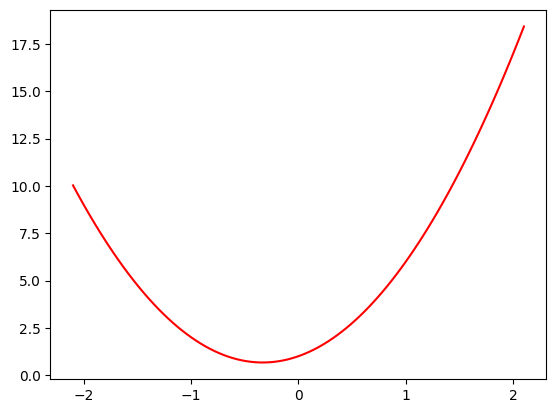

In [178]:
plot_function(f)

In [179]:
import numpy as np
from numpy.random import normal, seed, uniform

In [180]:
np.random.seed(42)

def noise(x, scale):
    return normal(scale=scale, size=x.shape)

def add_noise(x, mult, add):
    return x * (1 + noise(x, mult)) + noise(x, add)

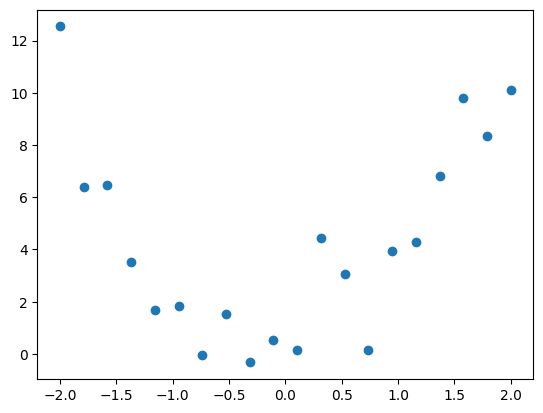

In [181]:
x = torch.linspace(-2, 2, steps=20)[:,None].numpy()
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y)

In [182]:
add_noise(f(x), 0.3, 1.5)

array([[10.27509841],
       [ 7.11050944],
       [ 3.47720634],
       [ 1.73601183],
       [ 2.72473106],
       [ 3.44390661],
       [ 0.88748113],
       [ 2.53054982],
       [ 1.2788629 ],
       [-0.58010863],
       [ 1.90678618],
       [ 4.01475368],
       [ 2.24431428],
       [ 7.20227813],
       [ 3.38577764],
       [10.62090953],
       [ 7.12998517],
       [10.10910588],
       [15.73298634],
       [18.99392678]])

In [183]:
x[:5],y[:5]

(array([[-2.       ],
        [-1.7894737],
        [-1.5789473],
        [-1.3684211],
        [-1.1578947]], dtype=float32),
 array([[12.53960137],
        [ 6.39753195],
        [ 6.45659116],
        [ 3.5169761 ],
        [ 1.69968521]]))

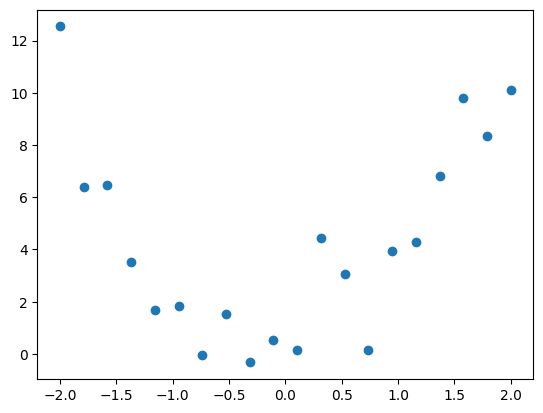

In [184]:
plt.scatter(x,y)

In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual

@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(make_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [185]:
import numpy

def mae(preds, acts):
    return (torch.abs(preds-acts)).mean()

In [42]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = make_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [186]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)
c = torch.tensor(3.0, requires_grad=True)

f = make_quad(a, b, c)

xt = torch.from_numpy(x).clone().requires_grad_(True)
yt = torch.from_numpy(y).clone().requires_grad_(True)

def quad_mae(params):
    f = make_quad(*params)
    return mae(f(xt), yt)

In [131]:
quad_mae([1.1, 1.1, 1.1])

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [187]:
abc = torch.tensor([1.1,1.1,1.1], requires_grad=True)

In [162]:
#abc.requires_grad_()
f(xt)

tensor([[ 3.0000],
        [ 2.6233],
        [ 2.3352],
        [ 2.1357],
        [ 2.0249],
        [ 2.0028],
        [ 2.0693],
        [ 2.2244],
        [ 2.4681],
        [ 2.8006],
        [ 3.2216],
        [ 3.7313],
        [ 4.3296],
        [ 5.0166],
        [ 5.7922],
        [ 6.6565],
        [ 7.6094],
        [ 8.6510],
        [ 9.7812],
        [11.0000]], grad_fn=<AddBackward0>)

In [188]:
loss = quad_mae(abc)
loss

tensor(2.1383, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [189]:
loss.backward()

In [190]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [191]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
    
print(f'loss={loss:.2f}')

loss=2.12


In [196]:
for i in range(10):
    loss = quad_mae(abc)
    abc.grad.data.zero_()
    loss.backward()
    with torch.no_grad():
        abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=1.73
step=1; loss=1.71
step=2; loss=1.70
step=3; loss=1.69
step=4; loss=1.68
step=5; loss=1.66
step=6; loss=1.65
step=7; loss=1.64
step=8; loss=1.63
step=9; loss=1.61


In [197]:
abc.grad

tensor([-1.0848, -0.0316, -0.3000])